# Ideal Flow Network (IFN) - Beginner's Guide

by [*Kardi Teknomo*](https://people.revoledu.com/kardi/)


## How To Install:

You need to have Python installed. Go to [Pypi.org](https://pypi.org/project/IdealFlowNetwork/) and find IdealFlowNetwork version 1.5.1 (or latest version)

> pip install IdealFlowNetwork

Alternatively, download the zip file from [GitHub](https://github.com/teknomo/IdealFlowNetwork), unzip the file in a folder. 
1. Go to folder *pkg*

> cd *your_folder_name*`/pkg`

2. In command Prompt > `pip install .`
   
> pip install . 

It copies the package files to your Python environment. If you computer does not have pip, check [ensurepip documentation](https://pip.pypa.io/en/stable/installation/#ensurepip)


# Basic Use of IFN

In this tutorial, you will learn how to use Ideal Flow Network module for defining and analyzing general networks.

To use the Ideal Flow Network module, you just need to import it.

In [1]:
from IdealFlow import Network as net  # from package import module as alias

The Network module contains IFN class. Let us call the IFN class and display the version.

In [2]:
n = net.IFN()
print('IFN version:', n.version)

IFN version: 1.5.1


If you set the name of the network, you can call it's name as its formal *representation*.

In [3]:
n = net.IFN("My First Network")
n

My First Network

However, printing it would produce the adjacency list. Since we did not yet define any link or node, it is just an empty adjacency list.

In [4]:
print(n)

{}


In IFN class, a network is expanded by adding links. When you add a link, the nodes is automatically added.

You can add a link by specifying the `start_node` and `end_node` and optionally, you can specify the link `weight`, which is caled *`flow`*. If you do not specify the link flow, by default, the flow is equal to one.

When a link does not exist, `add_link(start_node,end_node,[flow])` would create that link. When the link already exists, would only update by adding the flow.

Printing the network, would give you the string of adjacency list of the network. 

You can `show()` the network to visualize it as a figure. The total flow in the network is indicated as $\kappa$ in the totle of the figure, after the network name.

In the example below, node *b* is a sink node, therefore it has empty *end_node*.  

{'a': {'b': 3}, 'b': {}}


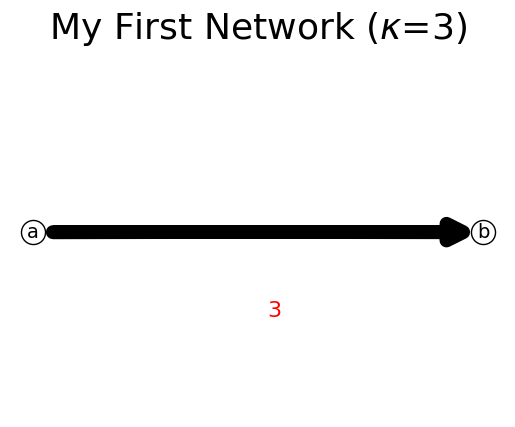

In [5]:
n.add_link('a','b',3)
print(n)
n.show();

You don't need to add node first when you add a link. Method `add_node(node_id)` would 
add a new node to the network if that node does not exist. This method is useful for adding an isolated node.

{'a': {'b': 3}, 'b': {}, 'c': {}}


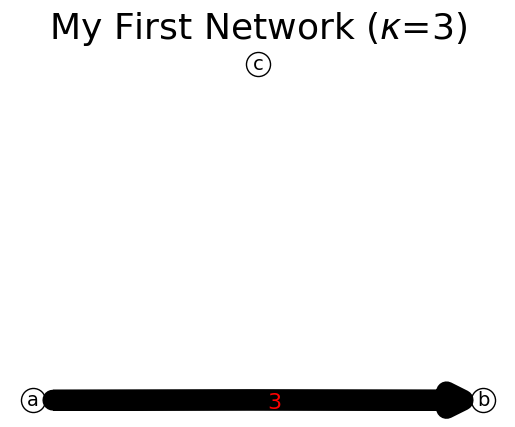

In [6]:
n.add_node('c')  # add an isolated node 'd'
print(n)
n.show();

We can delete the isolated node. Property `nodes` would return the list of nodes.

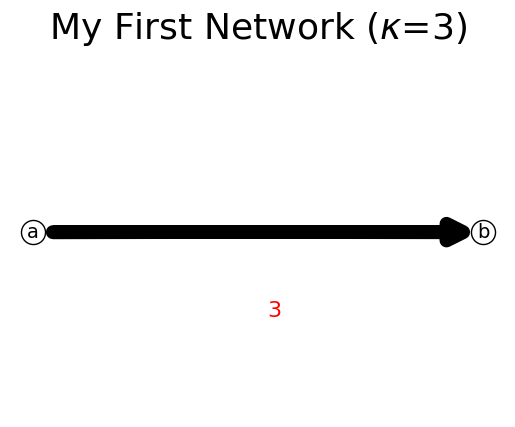

['a', 'b']


In [7]:
n.delete_node('c')
n.show();
print(n.nodes) 

Let us now add link *ac*

{'a': {'b': 3, 'c': 1}, 'b': {}, 'c': {}}


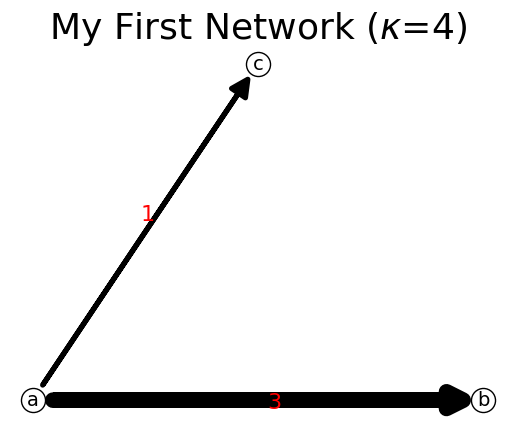

In [8]:
n.add_link('a','c')
print(n)
n.show();

Adding a link on the existing link will only update the link flow. Observe that link 'ac' is now has updated link flow.

{'a': {'b': 3, 'c': 2}, 'b': {}, 'c': {}}


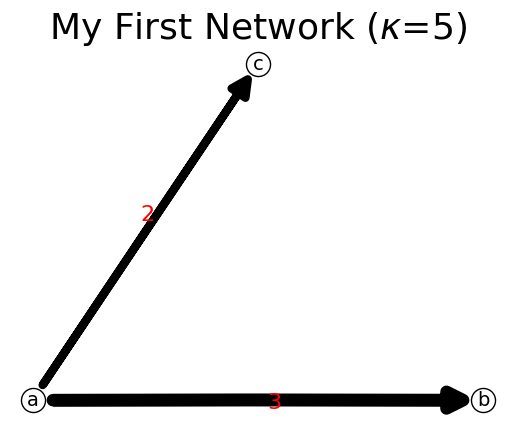

In [9]:

n.add_link('a','c')
print(n)
n.show();

`len` of the netwok would show the number of nodes.

In [10]:
len(n)

3

We can view the link flow by getting the link item.

In [11]:
n[('a','b')]

3

We can also set the link flow directly by replacing its value.

{'a': {'b': 8, 'c': 2}, 'b': {}, 'c': {}}


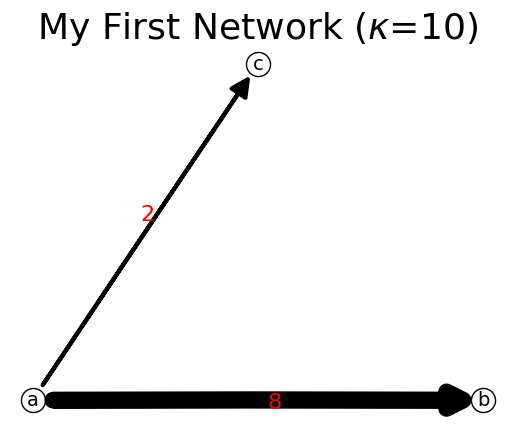

In [12]:
n[('a','b')]=8
print(n)
n.show();

The nodes in the network (which is the keys in adjacency list) forms an iterator that can be called in a loop.

In [13]:
n.add_link('b','c')
for node in n:
    print(node)

a
b
c


The flow in each node is shown as a dictionary by property `node_flow`.

In [14]:
n.nodes_flow

{'a': 10, 'b': 1, 'c': 0}

## Basic Data Structure of IFN

The basic data structure of the Ideal Flow Network is *adjacency list* or *matrix*. 
The adjacency list is a dictionary where the keys are the *from-nodes* and the values are dictionary of the *to-node* and its flow.

IFN is adjacency-list-based network. Any change of the adjacency list, it would also change the network. 
We can replace the entire data inside the network by `set_data(adjList)` method.
Method `get_data()` would return the internal data structure of adjacency list.

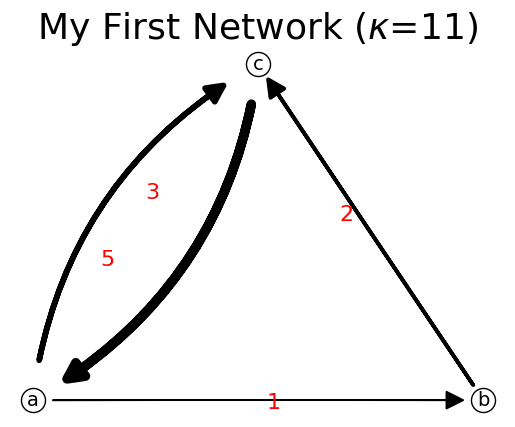

{'a': {'b': 1, 'c': 3}, 'b': {'c': 2}, 'c': {'a': 5}}

In [15]:
adjList = {'a': {'b': 1, 'c': 3}, 'b': {'c':2}, 'c': {'a':5}}
n.set_data(adjList)
n.show();
n.get_data()

Setting link flow to zero delete would delete the link but not delete the nodes.
In the example above, link `ab` has flow = 1. We can reduce this to zero.


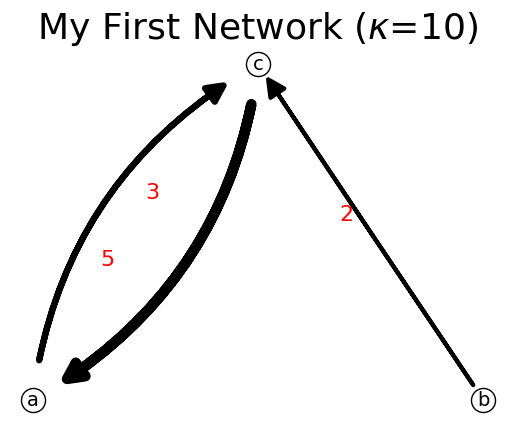

{'a': {'c': 3}, 'b': {'c': 2}, 'c': {'a': 5}}


In [16]:
n.reduce_link_flow('a','b')
n.show();
print(n)

Deleting non-existence of link, will just print a warning.

In [17]:
n.delete_link('c','b')
print(n)

{'a': {'c': 3}, 'b': {'c': 2}, 'c': {'a': 5}}


Unlike Graph theory, when we delete link in IFN, it would also delete the isolated nodes related to that deleted link.

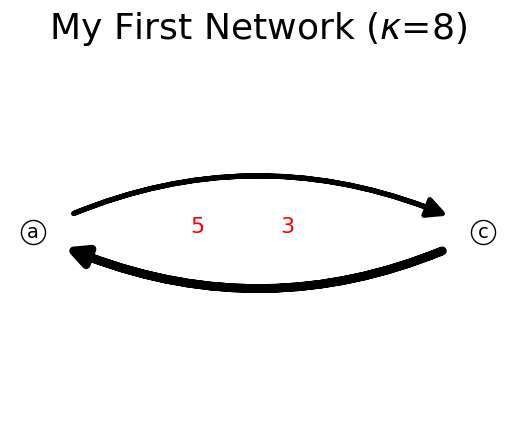

{'a': {'c': 3}, 'c': {'a': 5}}


In [18]:
n.delete_link('b','c')
n.show();
print(n)

Link flow can be negative but cannot be zero because zero link flow would remove the link from the network. 

{'a': {'c': 3, 'b': -1}, 'c': {'a': 5}}


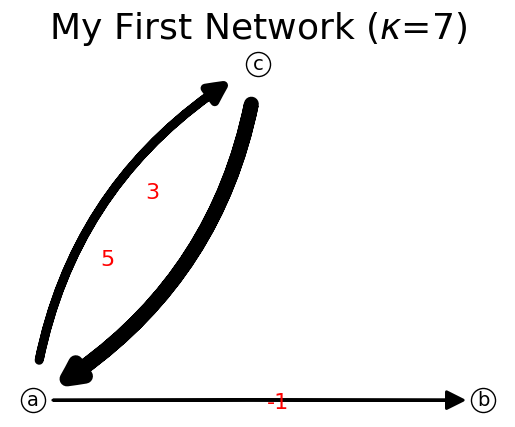

In [19]:
n[('a','b')]=-1
print(n)
n.show();

IFN can also be represented as a matrix and a list of nodes. Method `get_matrix()` would produce the internal capacity matrix and list of nodes of the network. 

In [20]:
C, listNode = n.get_matrix()
print('C:', C, '\nlist nodes:', listNode  )

C: [[0, -1, 3], [0, 0, 0], [5, 0, 0]] 
list nodes: ['a', 'b', 'c']


To set the network based on capacity matrix and list of nodes, we can use method `set_matrix(C,list_node)`.

{'a': {'b': 1, 'c': 3}, 'b': {'c': 4}, 'c': {'b': 2}}


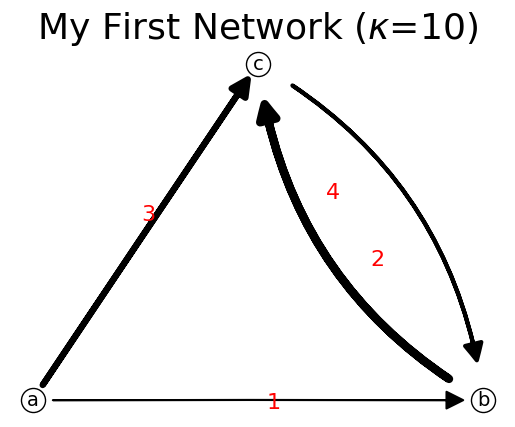

In [21]:
C=[[0, 1, 3], 
  [0, 0, 4], 
  [0, 2, 0]] 
n.set_matrix(C,listNode)
print(n)
n.show();

What will happen if we delete the existing node 'c'? Deleting a node would automatically delete the associated links connected to that deleted node. This behavior is as expected, exactly just like in graph theory.  

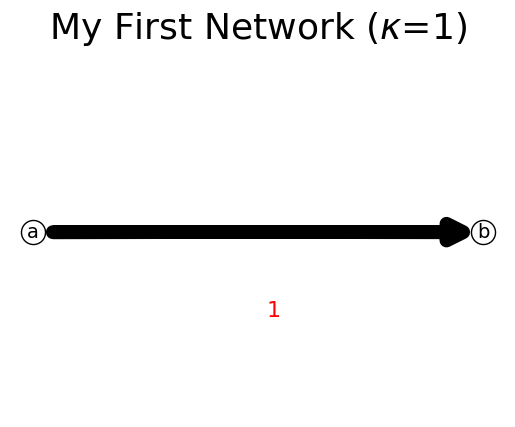

{'a': {'b': 1}, 'b': {}}


In [22]:
n.delete_node('c')

n.show();
print(n)

## Expandable Network

This is where the fun of IFN begins. 

The expandable network is a type of network that can be dynamically expanded or contracted as needed. The IFN is an expandable network.
We can expand the network by setting or assigning trajectories. Trajectories is a path represented by a list of nodes in sequence.
We can also contract the network by removing trajectories through unlearn method.
If the node or link exists, the flow would be updated by adding flow. By default it is adding flow with one unit, but we can set the change of flow in the parameter.
If the node or link does not exist, it would automatically create nodes or links. 

Method `assign(trajectory)` would add one unit of flow along the trajectory. It would update the link flow if the link exists, or create link if the link does not exist.

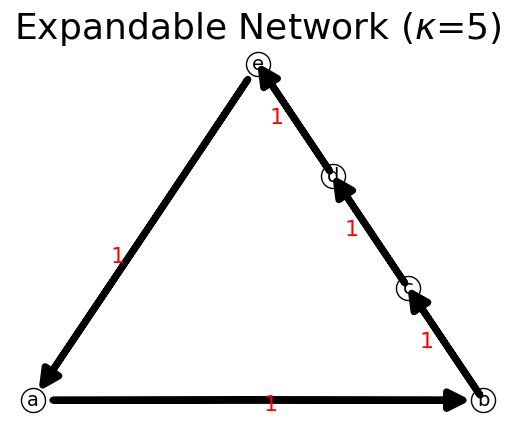

{'a': {'b': 1}, 'b': {'c': 1}, 'c': {'d': 1}, 'd': {'e': 1}, 'e': {'a': 1}}


In [23]:
n = net.IFN("Expandable Network")
trajectory =  ['a','b','c','d','e','a']
n.assign(trajectory)
n.show();
print(n)


We can also use more generic method `set_path(trajectory,delta_flow)` method to assign trajectory with any change of flow (which is not necessarily one unit of flow).

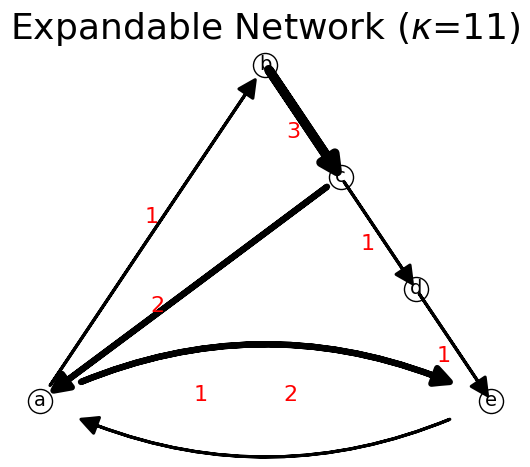

{'a': {'b': 1, 'e': 2}, 'b': {'c': 3}, 'c': {'d': 1, 'a': 2}, 'd': {'e': 1}, 'e': {'a': 1}}


In [24]:
trajectory =  ['b','c','a','e']
n.set_path(trajectory,2)
n.show();
print(n)

Using method `generate(startNode,is_cycle=True)`, we can generate random trajectory based on the network and start node. When is_cycle=True it would generate random cycle, otherwise it would generate based on random walk of random length between 1 and total nodes. It is possible that it might generate internal cycles in the generated trajectory.

In [25]:
print(n.generate('b'))
print(n.generate('b'))
print(n.generate('b', False))
print(n.generate('b', False))

['b', 'c', 'd', 'e', 'a', 'e', 'a', 'e', 'a', 'b']
['b', 'c', 'a', 'e', 'a', 'e', 'a', 'e', 'a', 'e', 'a', 'e', 'a', 'e', 'a', 'b']
['b', 'c', 'd', 'e']
['b', 'c']


We can use `get_path(startNode, endNode)` get the path from start node to end node. This path is not necessarily the shortest path. The search for path is based on Depth First Search (DFS). 

In [26]:
n.get_path('a','e')

['a', 'b', 'c', 'd', 'e']

If the path does not exist, it will produce an empty list

In [27]:
n.get_path('e','a')

['e', 'a']

We can also find all paths from start node to end node by method `find_all_paths(startNode, endNode)`

In [28]:

n.find_all_paths('a','e')

[['a', 'b', 'c', 'd', 'e'], ['a', 'e']]

We can find the shortest path by method `shortest_path(startNode, endNode)`.

In [29]:
n.shortest_path('a','e')

['a', 'e']

We can find the all shortest path matrix by method `all_shortest_path()`. The method produces path matrix and list of nodes. This method is based on Floyd-Warshall algorithm. The matrix value represents the sum of flow along the shortest path between a pair of nodes (row as start node, column as end node). If the value in the path matrix is *inf* it indicates there is no path between the start node and the end node. 

In [30]:
matrix,list_nodes=n.all_shortest_path()
print("Path matrix:",matrix,"\nList of nodes:",list_nodes)

Path matrix: [[3, 1, 4, 5, 2], [5, 6, 3, 4, 5], [2, 3, 6, 1, 2], [2, 3, 6, 7, 1], [1, 2, 5, 6, 3]] 
List of nodes: ['a', 'b', 'c', 'd', 'e']


If we want to find whether a certain trajectory is a valid path in the network, we can use method `is_path(trajectory)`. A link is a path but a node is not a path. Thus, a path has at least two nodes.

In [31]:
print("is ['a', 'b', 'c', 'd', 'e'] a path?",n.is_path(['a', 'b', 'c', 'd', 'e']))
print("is ['c', 'a', 'e'] a path?",n.is_path(['c', 'a', 'e']))
print("is ['c', 'a', 'e', 'd'] a path?",n.is_path(['c', 'a', 'e', 'd']))
print("is ['a', 'b'] a path?",n.is_path(['a', 'b']))
print("is ['a'] a path?",n.is_path(['a']))
print("is [] a path?",n.is_path([]))

is ['a', 'b', 'c', 'd', 'e'] a path? True
is ['c', 'a', 'e'] a path? True
is ['c', 'a', 'e', 'd'] a path? False
is ['a', 'b'] a path? True
is ['a'] a path? False
is [] a path? False


## Indicators

Once you have your network, you can see many indicators of the network.
The following indicators are all properties of the network.

* total_nodes
* total_links
* total_flow
* network_entropy
* average_node_entropy
* diameter
* density
* min_flow
* max_flow
* avg_flow
* stdev_flow
* cov_flow


Let us create a new network from a capacity matrix and list of nodes.  A **capacity matrix** is a weighted adjacency matrix.

{'a': {'b': 2}, 'b': {'c': 2}, 'c': {'b': 1, 'd': 2}, 'd': {'e': 1}, 'e': {'a': 1, 'c': 1}}


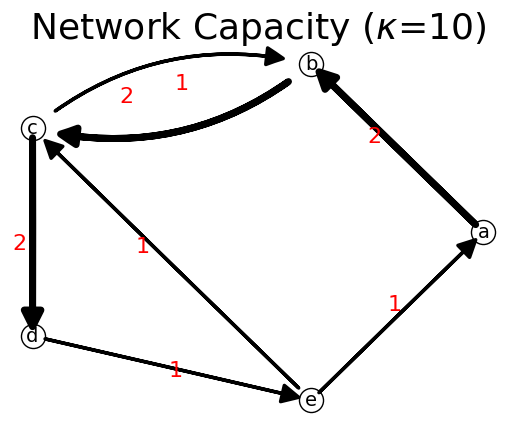

In [32]:
# Define the network (directed graph) from capacity matrix
C=[[0, 2, 0, 0, 0],
   [0, 0, 2, 0, 0], 
   [0, 1, 0, 2, 0], 
   [0, 0, 0, 0, 1],
   [1, 0, 1, 0, 0]]
list_nodes= ['a', 'b', 'c', 'd', 'e']
n = net.IFN("Network Capacity")
n.set_matrix(C,list_nodes)
print(n)
n.show(layout="Circular");

Now we get the network indicators

In [33]:
print('total nodes:',n.total_nodes)
print('total links:',n.total_links)
print('total flow:',n.total_flow)
print('network entropy:',n.network_entropy)
print('network entropy ratio:',n.network_entropy_ratio)
print('average node entropy:',n.average_node_entropy)
print('average node entropy ratio:',n.average_node_entropy_ratio)
print('network diameter:',n.diameter)
print('network density:',n.density)
print('min flow:',n.min_flow)
print('max flow:',n.max_flow)
print('average flow:',n.average_flow)
print('standard deviation of flow:',n.stdev_flow)
print('coefficient of variation of flow:',n.cov_flow)

total nodes: 5
total links: 7
total flow: 10
network entropy: 1.3296613488547582
network entropy ratio: 0.969570350190125
average node entropy: 0.541117452339652
average node entropy ratio: 1.951668662572215
network diameter: 4
network density: 0.7
min flow: 1
max flow: 2
average flow: 1.4285714285714286
standard deviation of flow: 0.1870439059165649
coefficient of variation of flow: 0.13093073414159542


## Testing

Once you have your network, you can test the network.
The following properties are useful to test the network.

* **is_connected**: there is an *undirected* path between any pair of nodes.
* **is_strongly_connected**: there is a *directed* path between any pair of nodes.
* **is_premagic**: sum of inflows is equal to sum of outflows in every node. 
* **is_ideal_flow**: strongly connected and premagic.
* **is_acyclic**: contains no directed cycle. 
* **is_contain_cycle**: contains at least one directed cycle. 
* **is_eulerian_cycle**: in-degree is equal to out-degree in every node.
* **is_bipartite**: if the nodes can be partitions into two subsets and each link connects the two subsets.

In [34]:
print("is_acyclic?",n.is_acyclic)
print("is_contain_cycle?",n.is_contain_cycle)
print("is_eulerian_cycle?",n.is_eulerian_cycle)
print("is_bipartite?",n.is_bipartite,'\n')

print("is_connected?",n.is_connected)
print("is_strongly_connected?",n.is_strongly_connected)
print("is_premagic?",n.is_premagic)
print("is_ideal_flow?",n.is_ideal_flow)


is_acyclic? False
is_contain_cycle? True
is_eulerian_cycle? False
is_bipartite? False 

is_connected? True
is_strongly_connected? True
is_premagic? False
is_ideal_flow? False


## Ideal Flow Network

Observe that our network above is not an ideal flow network type because even it is a strongly connected, the flow in some nodes are imbalance (no premagic).

To balance the flow in each node, while keeping the total flow $\kappa$, we can compute it the three steps:
1. Convert the *capacity matrix* $\mathbf{C}$ into a *stochastic matrix* $\mathbf{S}$
2. Compute the node flow *stationary distribution* $\mathbf{\pi}$ of the stochastic matrix via Markov chain by preserving the total flow $\kappa$.
3. Compute the *ideal flow matrix* $\mathbf{F}$ from the *stochastic matrix* $\mathbf{S}$ and the *stationary distribution* $\mathbf{\pi}$.


S= [[0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.33333333 0.         0.66666667 0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.         0.        ]] 

pi= [[1.]
 [2.]
 [3.]
 [2.]
 [2.]] 

F= [[0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 1. 0. 2. 0.]
 [0. 0. 0. 0. 2.]
 [1. 0. 1. 0. 0.]] 

{'a': {'b': 1.0000000000000004}, 'b': {'c': 2.0000000000000013}, 'c': {'b': 0.9999999999999993, 'd': 1.9999999999999987}, 'd': {'e': 1.9999999999999973}, 'e': {'a': 0.9999999999999991, 'c': 0.9999999999999991}}


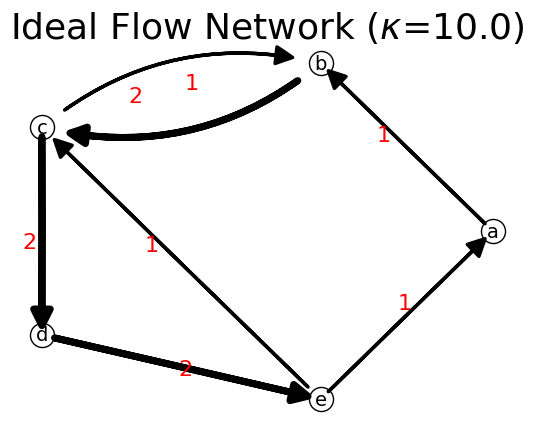

In [35]:
kappa=n.total_flow
S=n.capacity_to_stochastic(C)
print('S=',S,'\n')
pi=n.markov(S,kappa)
print('pi=',pi,'\n')
F=n.ideal_flow(S, pi)
print('F=',F,'\n')


n = net.IFN("Ideal Flow Network")
list_nodes= ['a', 'b', 'c', 'd', 'e']
n.set_matrix(F,list_nodes)
print(n)
n.show(layout="Circular");

We can test again

In [36]:
print("is_connected?",n.is_connected)
print("is_strongly_connected?",n.is_strongly_connected)
print("is_premagic?",n.is_premagic)
print("is_ideal_flow?",n.is_ideal_flow)

is_connected? True
is_strongly_connected? True
is_premagic? True
is_ideal_flow? True


I hope you enjoy this tutorial!